In [1]:
# -- Bib
import os
import sys
sys.path.append("..")

import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from fluxsus.DBFIX import DBFIX
from fluxsus.fluxnets.fluxnetsdef import CityFluxNet

PyTables is not installed. No support for HDF output.


In [2]:
# -- Open the three main datasets: CNES, CE GEODATA, SIHSUS.
basepath = os.path.join(os.environ["HOMEPATH"], "Documents", "data")
cnespath = os.path.join(basepath, "opendatasus", "cnes")
sihpath = os.path.join(basepath, "opendatasus", "sihsus", "PARQUET")
geopath = os.path.join(basepath, "shapefilesceqgis")

cnes_df = pd.read_parquet(os.path.join(cnespath, "cnes_st_1001_2312.parquet"))
geodata_df = gpd.read_parquet(os.path.join(geopath, "ce_geodata.parquet"))
sih_df = pd.read_parquet(os.path.join(sihpath, 'RDCE_2019.parquet'))

In [3]:
# -- Show Up
cnes_df.head()

,CNES,CODUFMUN,COD_CEP,CPF_CNPJ,PF_PJ,NIV_DEP,CNPJ_MAN,COD_IR,REGSAUDE,MICR_REG,...,NAT_JUR,AP01CV07,AP02CV07,AP03CV07,AP04CV07,AP05CV07,AP06CV07,AP07CV07,latitude,longitude
0,9999310,231130,63900085,00064176983353,1,1,00000000000000,None,None,None,...,4000,0,0,0,0,0,0,0,-4.970753,-39.014854
1,9999183,231340,62320069,05609698000241,3,1,00000000000000,None,None,None,...,2062,0,0,0,0,0,0,0,-3.725171,-40.991385
2,9998462,230765,61900410,33046146000127,3,1,00000000000000,None,None,None,...,2135,0,0,0,0,0,0,0,-3.877000,-38.626000
3,9998268,230730,63041187,29765135000120,3,1,00000000000000,None,21,None,...,2062,0,0,0,0,0,0,0,-7.213000,-39.315000
4,9997709,231290,62030362,06626253047387,3,1,00000000000000,None,None,None,...,2046,0,0,0,0,0,0,0,-3.659824,-40.376779


In [4]:
sih_df.head()

,ESPEC,N_AIH,ANO_CMPT,CNES,IDENT,MUNIC_RES,MARCA_UTI,VAL_SH,VAL_SP,VAL_TOT,...,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,COBRANCA,NATUREZA,GESTAO,MUNIC_MOV,MORTE,COMPLEX
0,03,2318107044210,2019,6848710,1,231395,00,1289.50,109.83,1399.33,...,20181222,20190116,I509,0000,41,00,2,231290,1,02
1,03,2319106936135,2019,6848710,1,230655,00,276.59,41.95,318.54,...,20190104,20190109,K859,0000,12,00,2,231290,0,02
2,03,2319106936146,2019,6848710,1,231200,75,2480.14,407.72,2887.86,...,20190104,20190108,N189,0000,41,00,2,231290,1,02
3,03,2319106936267,2019,6848710,1,231290,75,2728.14,217.82,2945.96,...,20190105,20190115,J189,0000,41,00,2,231290,1,02
4,03,2319106936333,2019,6848710,1,230900,00,487.13,73.23,560.36,...,20190105,20190119,E119,0000,12,00,2,231290,0,02


In [5]:
geodata_df.head()

,GEOCOD7,NM_MUNICIP,GEOCOD6,MACRO_ID,CRES_ID,geometry_municip,MACRO_NOME,geometry_macro,geometry_cres,centroid_municip,municip_lon,municip_lat
0,2300101,ABAIARA,230010,5,19,"POLYGON ((-39.08246 -7.29577, -39.08347 -7.292...",Superintendência Regional de Saúde Cariri,"POLYGON ((-38.67306 -6.70700, -38.67306 -6.707...","POLYGON ((-4354692.823 -865196.973, -4354812.2...",POINT (-39.03754 -7.35991),-39.037538,-7.359907
1,2300150,ACARAPE,230015,1,3,"POLYGON ((-38.67268 -4.27393, -38.67268 -4.273...",Superintendência Regional de Saúde Fortaleza,"MULTIPOLYGON (((-39.69667 -2.99902, -39.69216 ...","POLYGON ((-4325426.833 -465433.632, -4325426.8...",POINT (-38.66305 -4.22242),-38.663052,-4.222417
2,2300200,ACARAÚ,230020,4,12,"POLYGON ((-39.99113 -3.09797, -39.99117 -3.098...",Superintendência Regional de Saúde Norte,"MULTIPOLYGON (((-39.90892 -3.27414, -39.90892 ...","POLYGON ((-4503430.806 -312287.468, -4503430.7...",POINT (-40.08913 -2.96792),-40.089128,-2.967916
3,2300309,ACOPIARA,230030,5,18,"POLYGON ((-39.21390 -5.99175, -39.21278 -5.991...",Superintendência Regional de Saúde Cariri,"POLYGON ((-38.67306 -6.70700, -38.67306 -6.707...","POLYGON ((-4440719.425 -681940.298, -4440964.9...",POINT (-39.49282 -6.12241),-39.492823,-6.122411
4,2300408,AIUABA,230040,2,14,"POLYGON ((-40.14849 -6.36051, -40.14816 -6.360...",Superintendência Regional de Saúde Sertão Central,"POLYGON ((-40.08511 -6.36860, -40.08445 -6.370...","POLYGON ((-4448196.104 -680357.114, -4447996.7...",POINT (-40.29895 -6.60520),-40.298951,-6.605196


In [6]:
# -- define ICD-10 filters
icd_chapters_codes = {
        "I": [ 'A'+f'{n:2.0f}'.replace(' ', '0') for n in range(0, 100) ]+[ 'B'+f'{n:2.0f}'.replace(' ', '0') for n in range(0, 99) ],
        "II": [ 'C'+f'{n:2.0f}'.replace(' ', '0') for n in range(0, 100) ]+[ 'D'+f'{n:2.0f}'.replace(' ', '0') for n in range(0, 49) ],
        "III": [ 'D'+f'{n:2.0f}'.replace(' ', '0') for n in range(50, 90) ],
        "V": [ 'F'+f'{n:2.0f}'.replace(' ', '0') for n in range(0, 100) ],
        "IX": [ 'I'+f'{n:2.0f}'.replace(' ', '0') for n in range(1, 100) ],
        "X": [ 'J'+f'{n:2.0f}'.replace(' ', '0') for n in range(1, 100) ],
        "XX": [ 'V'+f'{n:2.0f}'.replace(' ', '0') for n in range(1, 100) ]+[ 'Y'+f'{n:2.0f}'.replace(' ', '0') for n in range(1, 99) ]
    }

In [7]:
# -- create the networks
cityflux = CityFluxNet(cnes_df, geodata_df)
cityflux.define_network()
cityflux.calculate_fluxes(sih_df)

In [8]:
cityflux.graph

In [8]:
g = cityflux.graph

In [9]:
g.number_of_edges()

1740

In [10]:
for v in g.edges():
    print(g.edges[v])

{'admission_count': 1, 'total_cost': 647.11, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 65, 'total_cost': 122726.52, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 351, 'total_cost': 194571.67, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 23, 'total_cost': 171152.38999999998, 'source_macro': 5.0, 'target_macro': 1}
{'admission_count': 34, 'total_cost': 77210.76, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 1, 'total_cost': 294.38, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 4, 'total_cost': 2223.74, 'source_macro': 5.0, 'target_macro': 5}
{'admission_count': 334, 'total_cost': 554342.58, 'source_macro': 1.0, 'target_macro': 1}
{'admission_count': 403, 'total_cost': 232246.48, 'source_macro': 1.0, 'target_macro': 1}
{'admission_count': 3, 'total_cost': 1048.45, 'source_macro': 1.0, 'target_macro': 1}
{'admission_count': 3, 'total_cost': 3573.6, 'source_macro': 1.0, 'target_macro': 2}
{'admission_count': 206, 'to

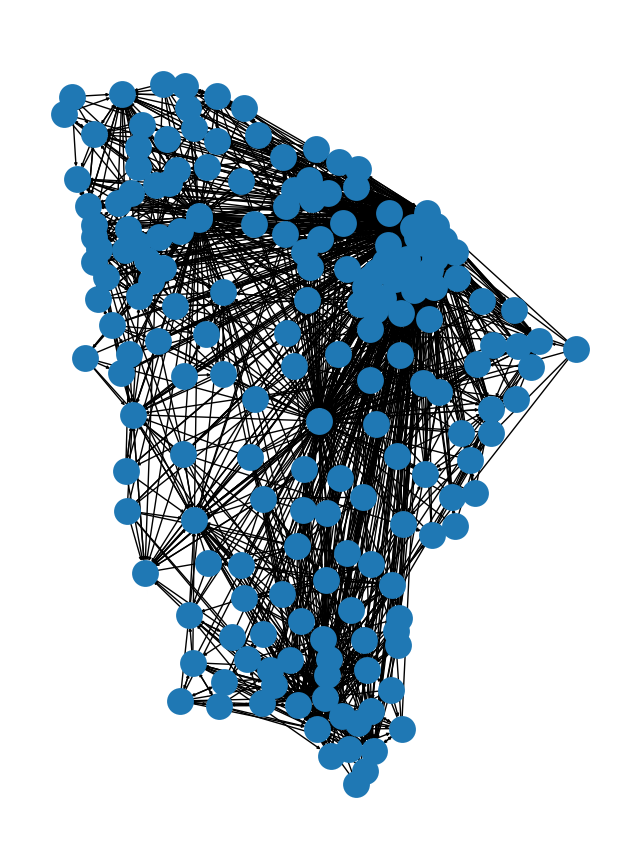

In [12]:
fig, ax = plt.subplots(1, figsize=(8,11))

nx.draw(g, pos=cityflux.geopos_net, ax=ax, arrows=True, arrowsize=4, alpha=1.0, linewidths=2)

In [31]:
cityflux.geopos_net

{0: array([-39.0375384 ,  -7.35990681]),
 1: array([-38.66305163,  -4.22241661]),
 2: array([-40.08912756,  -2.96791609]),
 3: array([-39.49282251,  -6.12241081]),
 4: array([-40.29895074,  -6.60519605]),
 5: array([-40.54461515,  -3.59283486]),
 6: array([-39.69888313,  -6.98578093]),
 7: array([-38.20057194,  -5.51762481]),
 8: array([-39.78571855,  -3.23993683]),
 9: array([-39.98158972,  -6.75666539]),
 10: array([-39.32128913,  -3.97139379]),
 11: array([-38.39440044,  -3.97645953]),
 12: array([-37.68676162,  -4.68050123]),
 13: array([-38.71612826,  -4.48329177]),
 14: array([-40.74695408,  -4.77294546]),
 15: array([-40.07665852,  -7.2390243 ]),
 16: array([-39.02707038,  -4.42067915]),
 17: array([-40.1551591 ,  -6.23918614]),
 18: array([-39.86955194,  -6.91423386]),
 19: array([-38.96921373,  -6.98919141]),
 20: array([-38.7531842 ,  -6.71189122]),
 21: array([-38.90338011,  -5.26245385]),
 22: array([-39.34452717,  -7.40315301]),
 23: array([-38.6205714 ,  -4.32755842]),
 2

In [ ]:
sih_df["EDGE"] = sih_df["MUNIC_RES"]+"-"+sih_df["MUNIC_MOV"]

In [7]:
grouped = sih_df.groupby(["MUNIC_RES", "MUNIC_MOV"]).agg(['sum', 'count'])["VAL_TOT"].reset_index()

In [9]:
grouped[grouped["MUNIC_RES"]!=grouped["MUNIC_MOV"]]

,MUNIC_RES,MUNIC_MOV,sum,count
0,110002,230440,454.69,1
1,110005,231140,213.92,1
2,110020,230440,8301.29,8
3,110020,231290,60.22,1
4,110030,230440,2315.84,4
...,...,...,...,...
2915,530010,231290,3265.96,5
2916,530010,231330,837.43,2
2917,530010,231360,324.62,1
2918,530010,231400,778.70,1


In [10]:
grouped

,MUNIC_RES,MUNIC_MOV,sum,count
0,110002,230440,454.69,1
1,110005,231140,213.92,1
2,110020,230440,8301.29,8
3,110020,231290,60.22,1
4,110030,230440,2315.84,4
...,...,...,...,...
2915,530010,231290,3265.96,5
2916,530010,231330,837.43,2
2917,530010,231360,324.62,1
2918,530010,231400,778.70,1


In [36]:
sih_df[(sih_df["MUNIC_RES"]=="231375") & (sih_df["MUNIC_MOV"]=="230440")]["VAL_TOT"]

15947     709.05
21131     270.54
21553     723.90
21698     802.70
21849     701.68
          ...   
24374    2163.02
25282     560.28
25403    6455.86
25773     562.28
27589     709.05
Name: VAL_TOT, Length: 222, dtype: float64

In [64]:
def vectorized_app(df):
    arr_slice = df[['MUNIC_RES', 'MUNIC_MOV']].values
    lidx = np.ravel_multi_index(arr_slice.T,(7,8))
    unq,unqtags,counts = np.unique(lidx,return_inverse=True,return_counts=True)
    return counts[unqtags]

In [65]:
xx = vectorized_app(sih_df)

TypeError: only int indices permitted

In [50]:
sih_df

,ESPEC,N_AIH,ANO_CMPT,CNES,IDENT,MUNIC_RES,MARCA_UTI,VAL_SH,VAL_SP,VAL_TOT,...,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,COBRANCA,NATUREZA,GESTAO,MUNIC_MOV,MORTE,COMPLEX
0,03,2318107044210,2019,6848710,1,231395,00,1289.50,109.83,1399.33,...,20181222,20190116,I509,0000,41,00,2,231290,1,02
1,03,2319106936135,2019,6848710,1,230655,00,276.59,41.95,318.54,...,20190104,20190109,K859,0000,12,00,2,231290,0,02
2,03,2319106936146,2019,6848710,1,231200,75,2480.14,407.72,2887.86,...,20190104,20190108,N189,0000,41,00,2,231290,1,02
3,03,2319106936267,2019,6848710,1,231290,75,2728.14,217.82,2945.96,...,20190105,20190115,J189,0000,41,00,2,231290,1,02
4,03,2319106936333,2019,6848710,1,230900,00,487.13,73.23,560.36,...,20190105,20190119,E119,0000,12,00,2,231290,0,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43064,07,2319107881431,2019,2561425,1,231410,00,528.07,78.35,606.42,...,20191009,20191012,J189,0000,12,00,1,231410,0,02
43065,01,2319107884940,2019,2561425,1,231410,00,117.21,70.41,187.62,...,20191202,20191203,O034,0000,12,00,1,231410,0,02
43066,01,2319107885006,2019,2561425,1,231410,00,306.55,136.44,442.99,...,20191203,20191204,K429,0000,12,00,1,231410,0,02
43067,01,2319107885028,2019,2561425,1,231410,00,306.55,146.96,453.51,...,20191203,20191204,K409,0000,12,00,1,231410,0,02


In [56]:
arr_slice = sih_df[['MUNIC_RES', 'MUNIC_MOV']].values

In [63]:
arr_slice.T

array([['231395', '230655', '231200', ..., '231410', '231410', '231410'],
       ['231290', '231290', '231290', ..., '231410', '231410', '231410']],
      dtype=object)

In [48]:
arr_slice.max(0)+1

TypeError: can only concatenate str (not "int") to str

In [61]:
np.ravel_multi_index(arr_slice.T, dims=(2,2))

TypeError: only int indices permitted